In [195]:
import random as rd
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt

EXERCICE 1

La matrice de Hilbert d’ordre 𝑛 est définie par 𝐀 = (a𝑖𝑗) avec 𝑖,𝑗 ∈ ⟦1, 𝑛⟧ et a𝑖𝑗 = 1/(𝑖 + 𝑗 − 1)

1) Ecrire un programme Python permettant de :
- Construire la matrice de Hilbert 𝐀 pour un ordre 𝑛 quelconque
- Calculer le conditionnement de 𝐀
- Calculer le produit det 𝐀 × det 𝐀−1 (théoriquement ce produit est toujours égal à 1)

In [196]:
# Génération d'une matrice de Hilbert quelconque

def hilbert(n):
    M = []
    for i in range(n):
        M.append([])
        for j in range(n):
            M[i].append(1 / (i + j + 1))
    return M

# Conditionnement (norme 2)

def conditionnement(M):
    K = alg.cond(M, 2)
    return K

def question1(n):
    # Matrice de Hilbert
    H = hilbert(n)
    print("\nMatrice de Hilbert de taille", n, ": \nH = ")
    for row in H:
        print(row)
    K = conditionnement(H)
    print("\nConditionnement de H :", K)

    # Produit déterminants
    det_H = alg.det(H)
    H_inv = alg.inv(H)
    det_H_inv = alg.det(H_inv)
    produit_det = det_H * det_H_inv
    print("\nProduit des déterminants det(H) * det(H^-1) :", produit_det, "--> doit être proche de 1")

2) Exécuter ce programme pour des valeurs de 𝑛 allant de 4 à 12 (on fera les calculs dans une boucle for). Commenter.

In [197]:
if __name__ == "__main__":
    for n in range(4, 13):
        print("\n---- Question 1 pour n =", n, "----")
        question1(n)


---- Question 1 pour n = 4 ----

Matrice de Hilbert de taille 4 : 
H = 
[1.0, 0.5, 0.3333333333333333, 0.25]
[0.5, 0.3333333333333333, 0.25, 0.2]
[0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
[0.25, 0.2, 0.16666666666666666, 0.14285714285714285]

Conditionnement de H : 15513.73873892924

Produit des déterminants det(H) * det(H^-1) : 1.0000000000000835 --> doit être proche de 1

---- Question 1 pour n = 5 ----

Matrice de Hilbert de taille 5 : 
H = 
[1.0, 0.5, 0.3333333333333333, 0.25, 0.2]
[0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666]
[0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285]
[0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125]
[0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111]

Conditionnement de H : 476607.2502422687

Produit des déterminants det(H) * det(H^-1) : 0.999999999997204 --> doit être proche de 1

---- Question 1 pour n = 6 ----

Matrice de Hilbert de taille 6 : 
H = 
[1.0, 0.5, 0.3333333333

3) On considère la matrice de Hilbert 𝐀 et le vecteur 𝐛 :
- a. Calculer la décomposition en valeurs singulières de 𝐀, et afficher les valeurs singulières de 𝐀 sous la forme d’une
courbe.

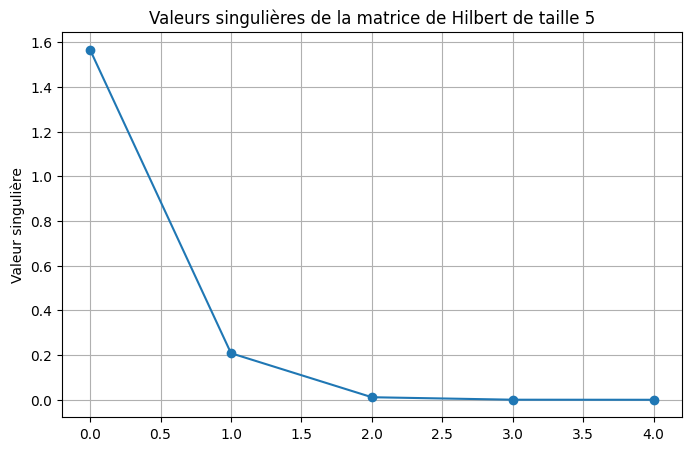

In [198]:
A = hilbert(5)
b = np.array([137/60, 29/20, 153/140, 743/840, 1879/2520])

U, S, V = alg.svd(A)

plt.figure(figsize=(8, 5))
plt.plot(S, marker='o')
plt.title("Valeurs singulières de la matrice de Hilbert de taille 5")
plt.ylabel("Valeur singulière")
plt.grid()
plt.show()

- b. Résoudre le système 𝐀𝐱 = 𝐛.
En toute rigueur la solution est [1, 1, 1, 1, 1]𝑇

In [199]:
print("x exact =", alg.solve(A, b))

x exact = [1. 1. 1. 1. 1.]


- c. On apporte sur le vecteur b une perturbation aléatoire 𝑑𝐛 de l’ordre de 0.1%, c‘est-à-dire : 

db = 0.001 * (0.5 - np.random.rand(*b.shape)) * b 

Résoudre le système 𝐀𝐱 = 𝐛 + 𝑑𝐛.

In [200]:
db = 0.001 * (0.5 - np.random.rand(*b.shape)) * b

print("x avec perturbation sur b =", alg.solve(A, b + db))

x avec perturbation sur b = [  0.69227458   6.79498437 -24.05542615  38.89734588 -17.55750763]


- d. Résoudre à nouveau le système 𝐀𝐱 = 𝐛 + 𝑑𝐛 en utilisant une régularisation de Tikhonov (on prendra 𝜆 = 0.001).